<a href="https://colab.research.google.com/github/2303a51060Nirnaya/High_performance_computing-Hcp-/blob/main/lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.Identification of NUMA Architecture and System
Topology

In [12]:
!lscpu

Architecture:                x86_64
  CPU op-mode(s):            32-bit, 64-bit
  Address sizes:             46 bits physical, 48 bits virtual
  Byte Order:                Little Endian
CPU(s):                      2
  On-line CPU(s) list:       0,1
Vendor ID:                   GenuineIntel
  Model name:                Intel(R) Xeon(R) CPU @ 2.20GHz
    CPU family:              6
    Model:                   79
    Thread(s) per core:      2
    Core(s) per socket:      1
    Socket(s):               1
    Stepping:                0
    BogoMIPS:                4400.40
    Flags:                   fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pg
                             e mca cmov pat pse36 clflush mmx fxsr sse sse2 ss h
                             t syscall nx pdpe1gb rdtscp lm constant_tsc rep_goo
                             d nopl xtopology nonstop_tsc cpuid tsc_known_freq p
                             ni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2ap
                   

In [13]:
!numactl --hardware

available: 1 nodes (0)
node 0 cpus: 0 1
node 0 size: 12975 MB
node 0 free: 7758 MB
node distances:
node   0 
  0:  10 


In [14]:
!apt-get install -y numactl
!numactl --hardware

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
numactl is already the newest version (2.0.14-3ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 82 not upgraded.
available: 1 nodes (0)
node 0 cpus: 0 1
node 0 size: 12975 MB
node 0 free: 7785 MB
node distances:
node   0 
  0:  10 


2.Memory Bandwidth Measurement on Single NUMA Node

In [19]:
import numpy as np
import time

size = 100_000_000

a = np.ones(size)
b = np.ones(size)

start = time.time()

for i in range(5):
    c = a + b
    d = c * 2

end = time.time()

total_bytes = a.nbytes * 2 * 5
time_taken = end - start
bandwidth = total_bytes / time_taken / (1024**3)

print("Execution Time:", time_taken, "seconds")
print("Effective Bandwidth:", bandwidth, "GB/s")

Execution Time: 3.9697635173797607 seconds
Effective Bandwidth: 1.8768323514246958 GB/s


3.Local vs Remote Memory Access Performance (NUMA-
Aware Execution)

In [16]:
for i in range(3):
    start = time.time()
    A *= 1.01
    print("Run", i+1, "Time:", time.time() - start)

Run 1 Time: 0.10775327682495117
Run 2 Time: 0.11123418807983398
Run 3 Time: 0.1161339282989502


4.Impact of Multi-threaded Memory Access on NUMA
Systems

In [17]:
import numpy as np
import threading
import time

size = 50_000_000
A = np.ones(size, dtype=np.float64)

def worker(start, end):
    A[start:end] *= 1.1

num_threads = 4
chunk = size // num_threads

threads = []
start_time = time.time()

for i in range(num_threads):
    t = threading.Thread(target=worker, args=(i*chunk, (i+1)*chunk))
    threads.append(t)
    t.start()

for t in threads:
    t.join()

end_time = time.time()

print("Execution Time:", end_time - start_time)

Execution Time: 0.050736188888549805


5.Comparative Study of NUMA-Unaware vs NUMA-Aware
Execution

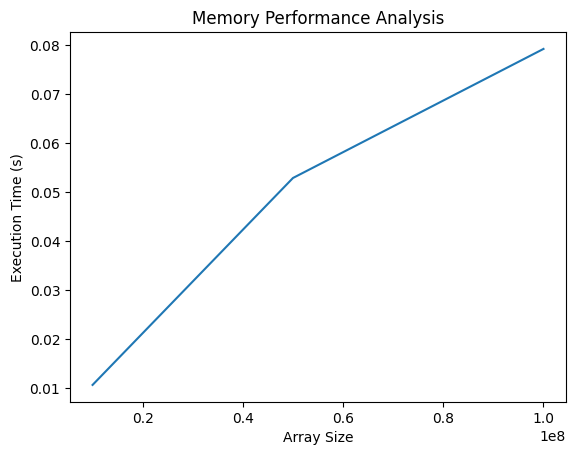

In [18]:
import matplotlib.pyplot as plt

sizes = [10_000_000, 50_000_000, 100_000_000]
times = []

for size in sizes:
    A = np.ones(size)
    start = time.time()
    A *= 1.1
    times.append(time.time() - start)

plt.plot(sizes, times)
plt.xlabel("Array Size")
plt.ylabel("Execution Time (s)")
plt.title("Memory Performance Analysis")
plt.show()